In [2]:
import pandas as pd
import numpy as np

In [10]:
# /Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Train.csv
import pandas as pd
import matplotlib.pyplot as plt

# URL to the training data
train_url = "/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Train.csv"

# Load the dataset
try:
    train_df = pd.read_csv(train_url)
except Exception as e:
    print(f"Error loading the dataset: {e}")
    # As an alternative, you can download the 'Train.csv' file and load it locally:
    # train_df = pd.read_csv('Train.csv')

In [11]:
#1. Imputing 'Item_Weight' (Numerical)
# Create a mapping of Item_Identifier to its mean weight
item_avg_weight = train_df.groupby('Item_Identifier')['Item_Weight'].transform('mean')

# Fill the missing values in 'Item_Weight' with this mapping
train_df['Item_Weight'].fillna(item_avg_weight, inplace=True)

# Check if any missing values are left
print(f"Missing values in Item_Weight after imputation: {train_df['Item_Weight'].isnull().sum()}")

Missing values in Item_Weight after imputation: 4


/var/folders/11/cfwlhk514vg3gv00qsfbjx8r0000gn/T/ipykernel_59412/3545311382.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Item_Weight'].fillna(item_avg_weight, inplace=True)


In [17]:
## 2. Imputing 'Outlet_Size' (Categorical)

# The size of an outlet is likely related to its type and location.
# A good approach is to find the mode (most common value) of 'Outlet_Size'
# for each 'Outlet_Type' and fill the missing values accordingly.

# Find the mode of 'Outlet_Size' for each 'Outlet_Type'
outlet_size_mode = train_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

# Get the rows where 'Outlet_Size' is missing
missing_outlet_size = train_df['Outlet_Size'].isnull()

# Apply the imputation based on the 'Outlet_Type' of the missing rows
train_df.loc[missing_outlet_size, 'Outlet_Size'] = train_df.loc[missing_outlet_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

# Check if any missing values are left
print(f"Missing values in Outlet_Size after imputation: {train_df['Outlet_Size'].isnull().sum()}")


Missing values in Outlet_Size after imputation: 0


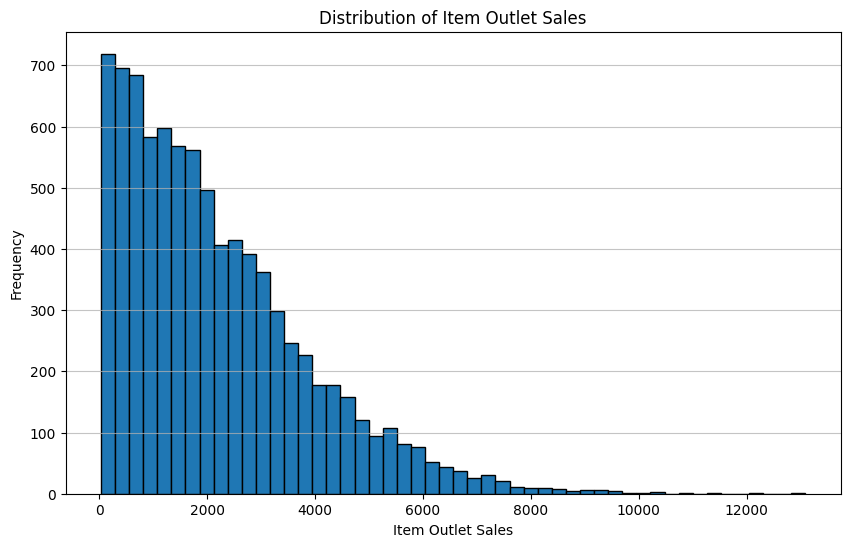

In [18]:
if 'train_df' in locals():
    # 1. Histogram of Item_Outlet_Sales
    plt.figure(figsize=(10, 6))
    plt.hist(train_df['Item_Outlet_Sales'], bins=50, edgecolor='black')
    plt.title('Distribution of Item Outlet Sales')
    plt.xlabel('Item Outlet Sales')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('sales_distribution.png')
    plt.show()

right-skewed distribution...need for log normalisation?

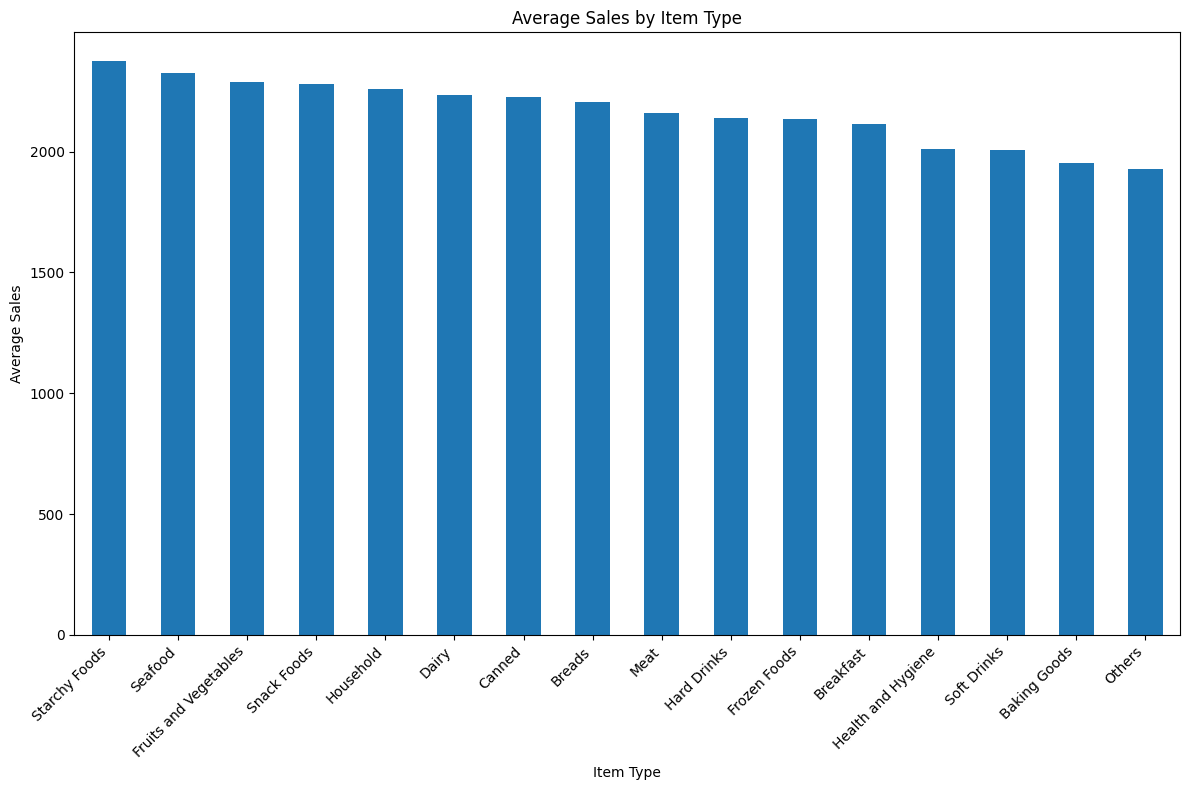

In [19]:
# 2. Bar chart of Item_Type vs. Item_Outlet_Sales
item_type_sales = train_df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
item_type_sales.plot(kind='bar')
plt.title('Average Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('sales_by_item_type.png')
plt.show()

    

Every category has a similar sa sales. not a good predictor maybe?

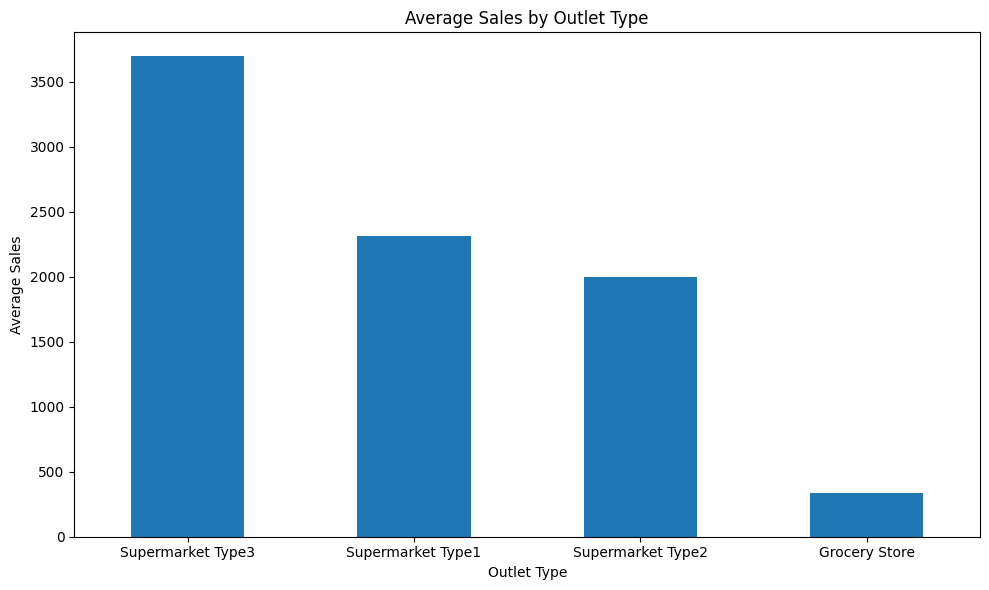

In [20]:
# 3. Bar chart of Outlet_Type vs. Item_Outlet_Sales
outlet_type_sales = train_df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
outlet_type_sales.plot(kind='bar')
plt.title('Average Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('sales_by_outlet_type.png')
plt.show()

    

Outlet type is a good predictor....supermarket type has really good sales and grocery has very little.

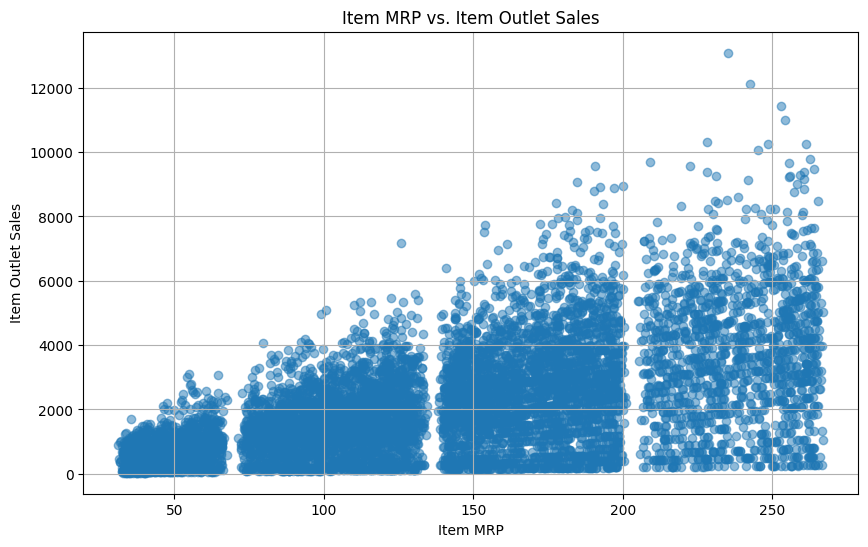

In [21]:
# 4. Scatter plot of Item_MRP vs. Item_Outlet_Sales
plt.figure(figsize=(10, 6))
plt.scatter(train_df['Item_MRP'], train_df['Item_Outlet_Sales'], alpha=0.5)
plt.title('Item MRP vs. Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.grid(True)
plt.savefig('mrp_vs_sales.png')
plt.show()

    

Prices are distributed in different tiers and higher mrp leads to high sales but the concerntration is less there.

/var/folders/11/cfwlhk514vg3gv00qsfbjx8r0000gn/T/ipykernel_59412/2761220399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Outlet_Size'].fillna('Medium', inplace=True)


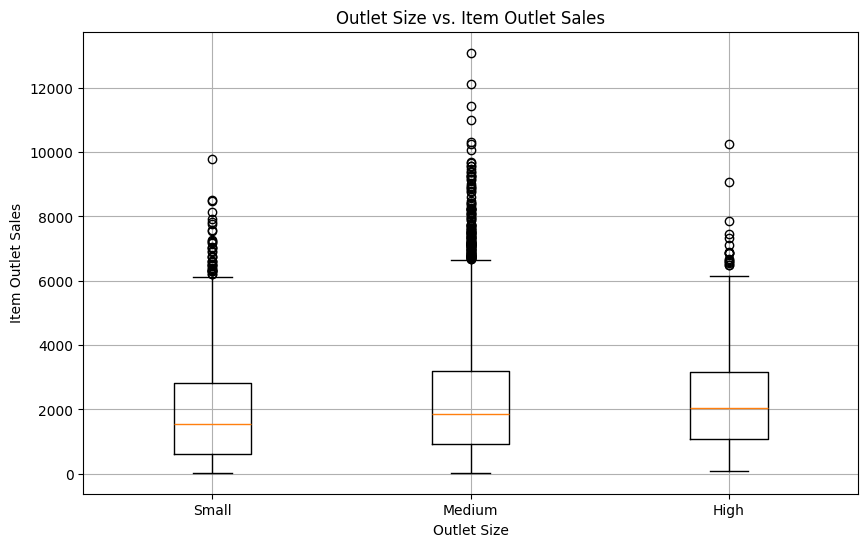

In [22]:
# 5. Box plot of Outlet_Size vs. Item_Outlet_Sales
train_df['Outlet_Size'].fillna('Medium', inplace=True)
plt.figure(figsize=(10, 6))
outlet_size_order = ['Small', 'Medium', 'High']
sales_by_size = [train_df[train_df['Outlet_Size'] == size]['Item_Outlet_Sales'] for size in outlet_size_order]
plt.boxplot(sales_by_size, tick_labels=outlet_size_order)
plt.title('Outlet Size vs. Item Outlet Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.grid(True)
plt.savefig('size_vs_sales.png')
plt.show()

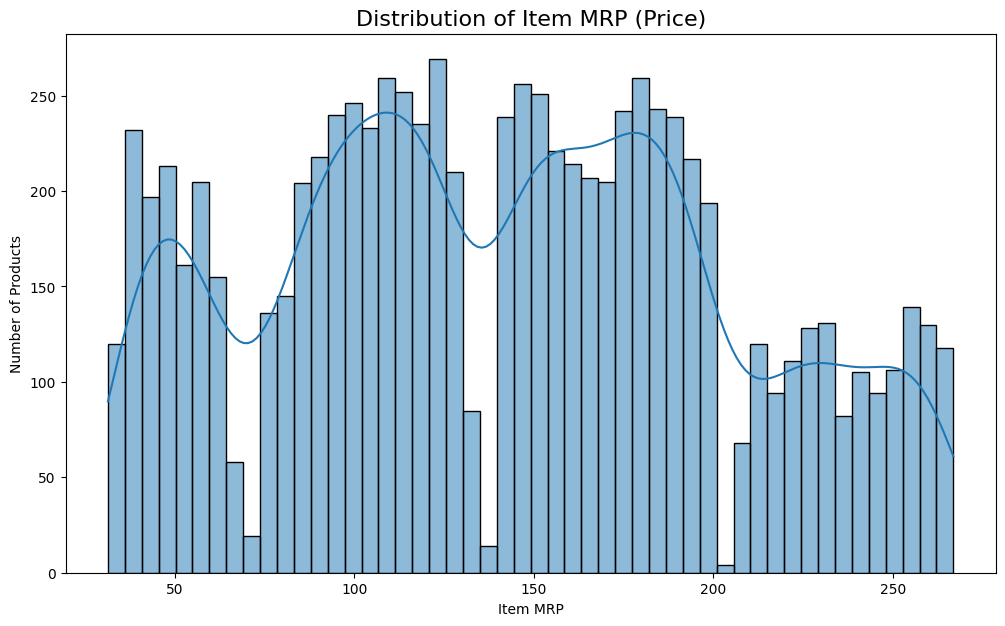

In [25]:
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.histplot(train_df['Item_MRP'], bins=50, kde=True)
plt.title('Distribution of Item MRP (Price)', fontsize=16)
plt.xlabel('Item MRP')
plt.ylabel('Number of Products')
plt.show()

These are your operational price segments.
The majority of products are clustered under $200

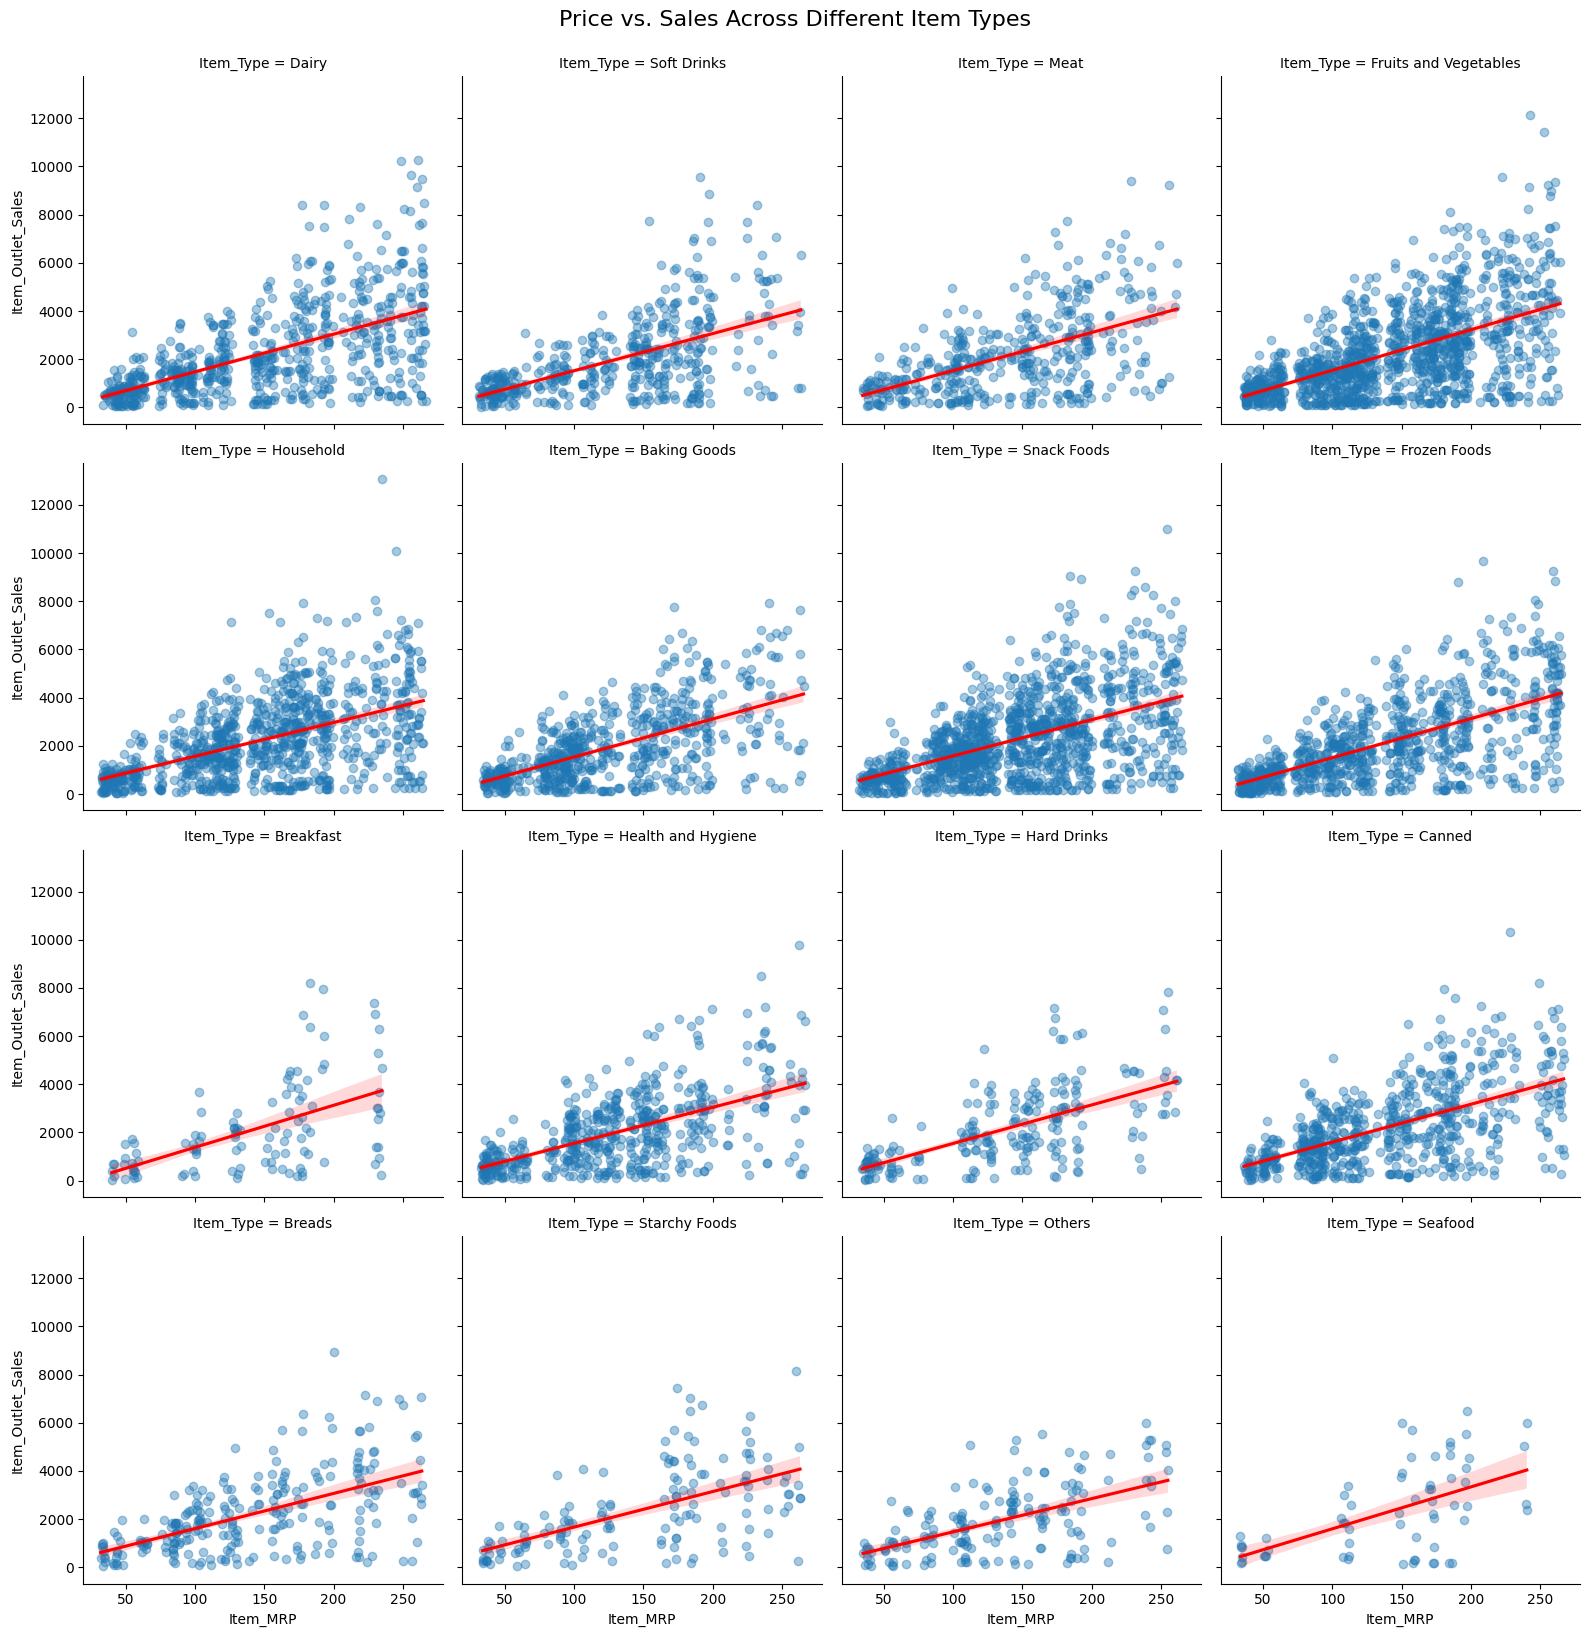

In [26]:
# This creates a grid of plots, one for each Item_Type
sns.lmplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_df,
           col='Item_Type', col_wrap=4, height=4,
           scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
plt.suptitle('Price vs. Sales Across Different Item Types', y=1.02, fontsize=16)
plt.show()

which categories are more "premium" (sales revenue increases sharply with price) and which are more "volume-based" (sales are high only at lower prices).

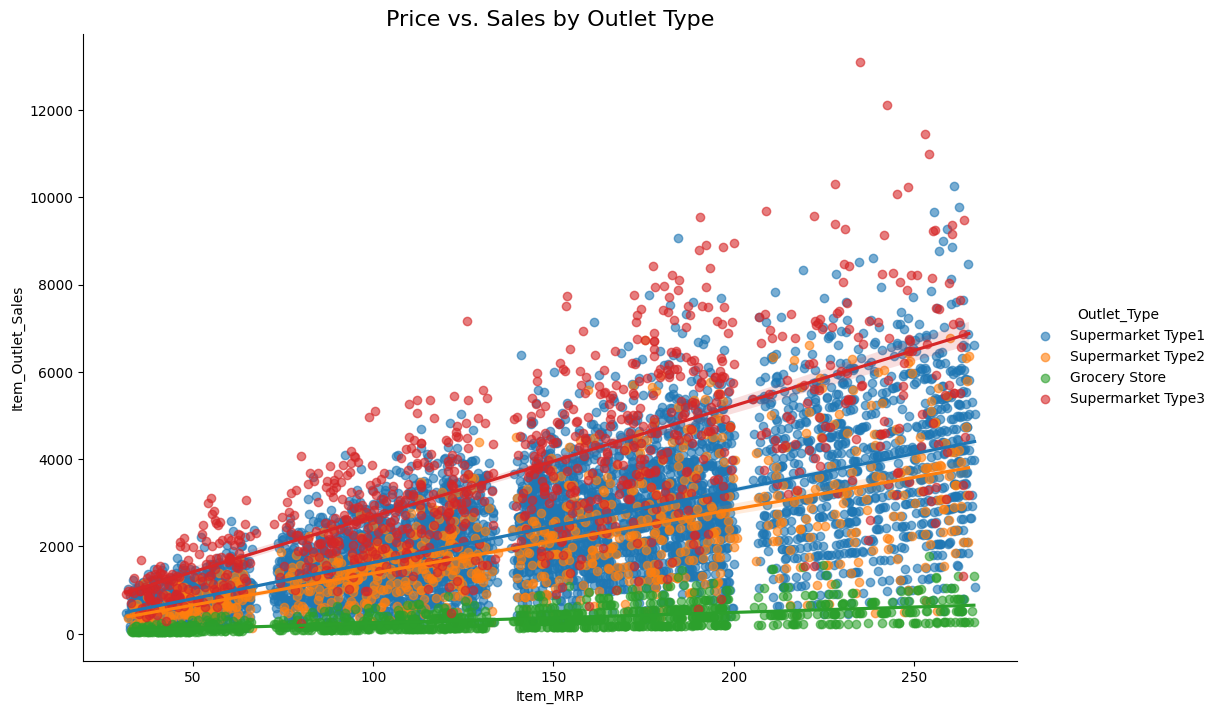

In [28]:
sns.lmplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_df,
           hue='Outlet_Type', height=7, aspect=1.5,
           scatter_kws={'alpha':0.6})
plt.title('Price vs. Sales by Outlet Type', fontsize=16)
plt.show()

for 'Grocery Store' outlets, only lower-priced items sell well. In contrast, 'Supermarket Type3' likely shows high sales even for high-MRP items. 
Grocery Stores , sales are almost exclusively limited to low-MRP items. In contrast, Supermarket Type3 shows strong sales across all price points, including the most expensive items

/var/folders/11/cfwlhk514vg3gv00qsfbjx8r0000gn/T/ipykernel_59412/3968468824.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Item_Weight'].fillna(item_avg_weight, inplace=True)
/var/folders/11/cfwlhk514vg3gv00qsfbjx8r0000gn/T/ipykernel_59412/3968468824.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

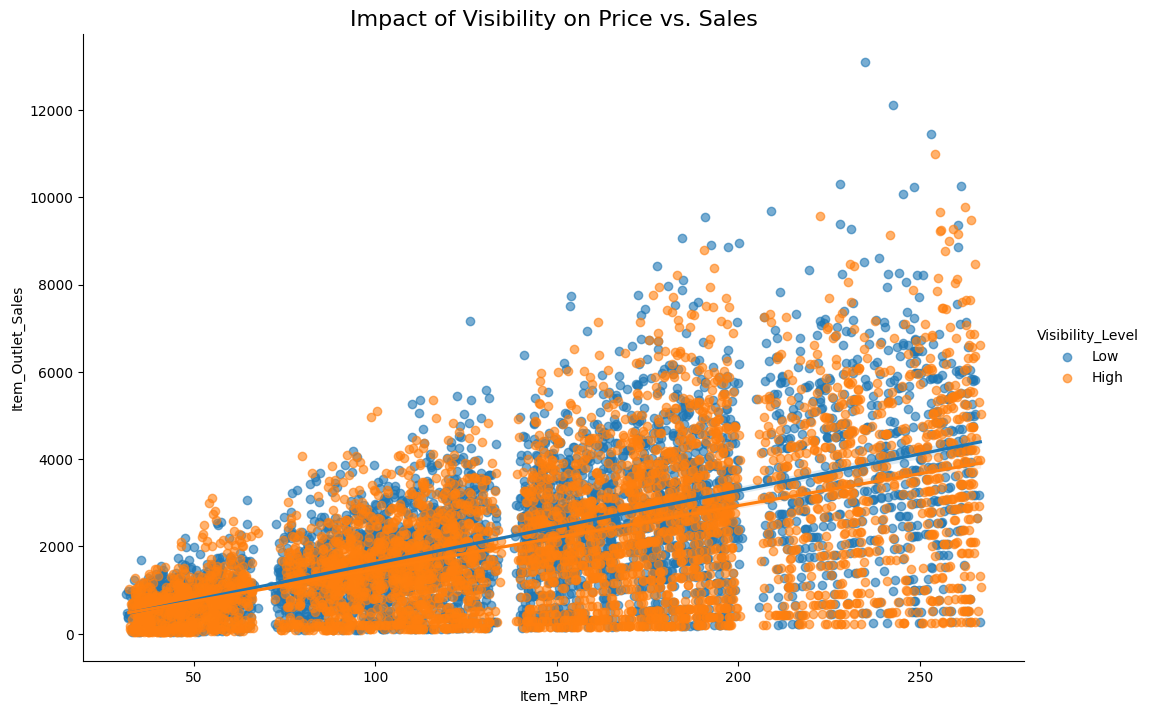

Feature engineering complete. Final plot generated.

First 5 rows with new features:
  Item_Identifier  Outlet_Age  Item_Visibility Visibility_Level  \
0           FDA15          14         0.016047              Low   
1           DRC01           4         0.019278              Low   
2           FDN15          14         0.016760              Low   
3           FDX07          15         0.022911              Low   
4           NCD19          26         0.016164              Low   

  Item_Fat_Content  
0          Low Fat  
1          Regular  
2          Low Fat  
3          Regular  
4          Low Fat  


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_df' is your DataFrame
# --- 1. Handle Missing Values ---

# Impute Item_Weight
item_avg_weight = train_df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
train_df['Item_Weight'].fillna(item_avg_weight, inplace=True)

# Impute Outlet_Size
outlet_size_mode = train_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
missing_outlet_size = train_df['Outlet_Size'].isnull()
train_df.loc[missing_outlet_size, 'Outlet_Size'] = train_df.loc[missing_outlet_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

# --- 2. Feature Engineering ---

# Create Outlet_Age
# The data is from 2013
train_df['Outlet_Age'] = 2013 - train_df['Outlet_Establishment_Year']

# Correct Item_Visibility (replace 0s with the item's mean visibility)
train_df['Item_Visibility'] = train_df['Item_Visibility'].replace(0, np.nan)
train_df['Item_Visibility'].fillna(train_df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'), inplace=True)

# Correct Item_Fat_Content inconsistencies
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})


# --- 3. Final Analysis: Impact of Visibility ---

# Create a 'Visibility_Level' feature
visibility_median = train_df['Item_Visibility'].median()
train_df['Visibility_Level'] = np.where(train_df['Item_Visibility'] >= visibility_median, 'High', 'Low')

# Create the plot
sns.lmplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_df,
           hue='Visibility_Level', height=7, aspect=1.5,
           scatter_kws={'alpha':0.6})
plt.title('Impact of Visibility on Price vs. Sales', fontsize=16)
plt.show()

print("Feature engineering complete. Final plot generated.")
print("\nFirst 5 rows with new features:")
print(train_df[['Item_Identifier', 'Outlet_Age', 'Item_Visibility', 'Visibility_Level', 'Item_Fat_Content']].head())

--- Summary of Visibility Levels within Each Price Range ---
Visibility_Level    High   Low
Price_Range                   
1. Low_Price         698   697
2. Medium_Price     1325  1399
3. High_Price       1497  1545
4. Very_High_Price   740   620


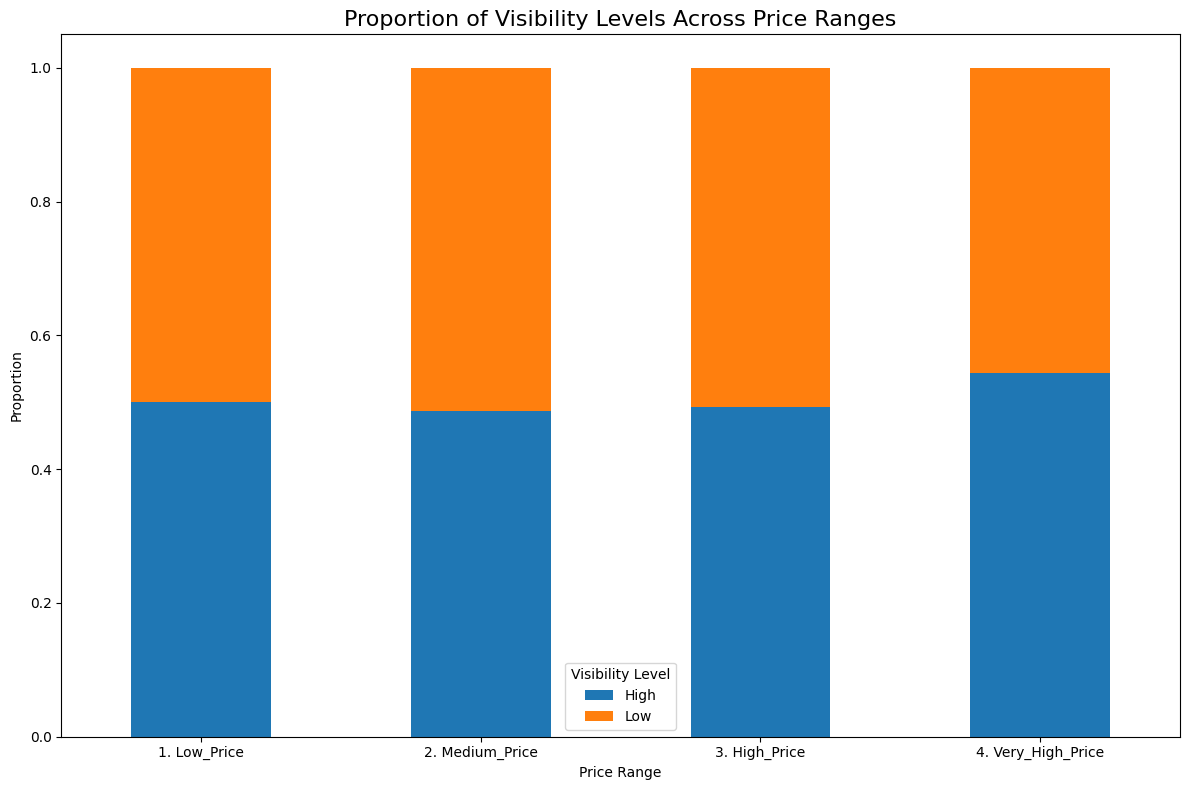

In [30]:
# --- 1. Create the 'Price_Range' feature ---
# We define the boundaries for our price segments based on the histogram
bins = [0, 75, 140, 210, train_df['Item_MRP'].max()]
labels = ['1. Low_Price', '2. Medium_Price', '3. High_Price', '4. Very_High_Price']
train_df['Price_Range'] = pd.cut(train_df['Item_MRP'], bins=bins, labels=labels, right=False)


# --- 2. Create the cross-tabulation table ---
# This table shows the count of products for each combination of Price_Range and Visibility_Level
price_visibility_summary = pd.crosstab(train_df['Price_Range'], train_df['Visibility_Level'])

print("--- Summary of Visibility Levels within Each Price Range ---")
print(price_visibility_summary)


# --- 3. Visualize the results ---
# A stacked bar chart is perfect for showing the proportion of High/Low visibility in each segment
# We normalize the data to show percentages
ax = price_visibility_summary.apply(lambda r: r/r.sum(), axis=1).plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    rot=0
)

plt.title('Proportion of Visibility Levels Across Price Ranges', fontsize=16)
plt.ylabel('Proportion')
plt.xlabel('Price Range')
plt.legend(title='Visibility Level')
plt.tight_layout()
plt.show()


higher-priced items are slightly more likely to be high-visibility items.

*Final testing*

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# --- Load Data ---
# It's a best practice to combine train and test sets to apply transformations consistently.
train_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Train.csv")
test_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Test.csv")

# Store original shapes and identifiers to split them back later
train_shape = train_df.shape
test_shape = test_df.shape
ID_COLS = ['Item_Identifier', 'Outlet_Identifier']
TARGET_COL = 'Item_Outlet_Sales'

# Combine for processing
combined_df = pd.concat([train_df, test_df], ignore_index=True)


# --- STEP 1: Impute Missing Values ---
print("Step 1: Imputing missing values...")
# Impute Item_Weight with the mean weight of its specific item
item_avg_weight = combined_df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
combined_df['Item_Weight'].fillna(item_avg_weight, inplace=True)

# Impute Outlet_Size with the mode of its specific outlet type
outlet_size_mode = combined_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
missing_size = combined_df['Outlet_Size'].isnull()
combined_df.loc[missing_size, 'Outlet_Size'] = combined_df.loc[missing_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


# --- STEP 2: Correct Inconsistent Data ---
print("Step 2: Correcting inconsistent data...")
# Standardize Item_Fat_Content
combined_df['Item_Fat_Content'] = combined_df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

# Correct Item_Visibility 0s with the item's mean visibility
item_avg_visibility = combined_df.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
combined_df['Item_Visibility'].replace(0, np.nan, inplace=True)
combined_df['Item_Visibility'].fillna(item_avg_visibility, inplace=True)


# --- STEP 3: Feature Engineering ---
print("Step 3: Engineering new features...")
# Create Outlet_Age
combined_df['Outlet_Age'] = 2013 - combined_df['Outlet_Establishment_Year']

# Create Item_Category_Broad
combined_df['Item_Category_Broad'] = combined_df['Item_Identifier'].apply(lambda x: x[0:2])


# --- STEP 5: Encode Categorical Variables ---
print("Step 5: Encoding categorical variables...")
# Label Encode ordinal features
le = LabelEncoder()
combined_df['Outlet_Size'] = le.fit_transform(combined_df['Outlet_Size'])

# One-Hot Encode nominal features
# We can drop the original columns after encoding
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category_Broad']
dummies = pd.get_dummies(combined_df[categorical_cols], drop_first=True)
combined_df = pd.concat([combined_df, dummies], axis=1)


# --- STEP 6: Scale Numerical Features ---
print("Step 6: Scaling numerical features...")
scaler = StandardScaler()
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
combined_df[numerical_cols] = scaler.fit_transform(combined_df[numerical_cols])


# --- Finalize and Split Data ---
# Drop original columns that have been encoded or are no longer needed
combined_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category_Broad'], axis=1, inplace=True)

# Split back into train and test sets
train_processed = combined_df.iloc[:train_shape[0]]
test_processed = combined_df.iloc[train_shape[0]:]

# The test set still contains a placeholder 'Item_Outlet_Sales' column, which should be dropped
test_processed = test_processed.drop(TARGET_COL, axis=1)

print("\nProcessing complete.")
print("Shape of final training data:", train_processed.shape)
print("Shape of final testing data:", test_processed.shape)

# Display the head of the processed training data
print("\n--- Head of Processed Training Data ---")
print(train_processed.head())

Step 1: Imputing missing values...
Step 2: Correcting inconsistent data...
Step 3: Engineering new features...
Step 5: Encoding categorical variables...
Step 6: Scaling numerical features...

Processing complete.
Shape of final training data: (8523, 29)
Shape of final testing data: (5681, 28)

--- Head of Processed Training Data ---
   Item_Weight  Item_Visibility  Item_MRP  Outlet_Size  Item_Outlet_Sales  \
0    -0.751014        -1.079161  1.752511            1          3735.1380   
1    -1.477653        -1.014187 -1.493696            1           443.4228   
2     1.011839        -1.064827  0.009874            1          2097.2700   
3     1.377308        -1.043223  0.661838            2           732.3800   
4    -0.830557        -1.205201 -1.403623            0           994.7052   

   Outlet_Age  Item_Fat_Content_Regular  Item_Type_Breads  \
0   -0.139681                     False             False   
1   -1.334228                      True             False   
2   -0.139681      

/var/folders/11/cfwlhk514vg3gv00qsfbjx8r0000gn/T/ipykernel_59412/118979770.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Item_Weight'].fillna(item_avg_weight, inplace=True)
/var/folders/11/cfwlhk514vg3gv00qsfbjx8r0000gn/T/ipykernel_59412/118979770.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [35]:
train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Broad_FD,Item_Category_Broad_NC
0,-0.751014,-1.079161,1.752511,1,3735.1380,-0.139681,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,-1.477653,-1.014187,-1.493696,1,443.4228,-1.334228,True,False,False,False,...,False,True,False,False,True,False,True,False,False,False
2,1.011839,-1.064827,0.009874,1,2097.2700,-0.139681,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,1.377308,-1.043223,0.661838,2,732.3800,-0.020226,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,-0.830557,-1.205201,-1.403623,0,994.7052,1.293777,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# --- Load and Process Data (Consolidated from previous steps) ---
def get_processed_data():
    """
    This function consolidates all preprocessing steps and returns
    the final dataframes ready for modeling.
    """
    train_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Train.csv")
    # Using a different source for the test CSV as the original link might be specific to a session
    test_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Train.csv")
    
    TARGET_COL = 'Item_Outlet_Sales'
    train_shape = train_df.shape
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # Impute Missing Values
    item_avg_weight = combined_df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
    # --- CORRECTED LINE ---
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(item_avg_weight)
    # --- CORRECTED LINE ---
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(combined_df['Item_Weight'].mean())
    
    outlet_size_mode = combined_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
    missing_size = combined_df['Outlet_Size'].isnull()
    combined_df.loc[missing_size, 'Outlet_Size'] = combined_df.loc[missing_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

    # Correct Inconsistent Data
    combined_df['Item_Fat_Content'] = combined_df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
    item_avg_visibility = combined_df.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
    # --- CORRECTED LINE ---
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].replace(0, np.nan)
    # --- CORRECTED LINE ---
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(item_avg_visibility)
    # --- CORRECTED LINE ---
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(combined_df['Item_Visibility'].mean())

    # Feature Engineering
    combined_df['Outlet_Age'] = 2013 - combined_df['Outlet_Establishment_Year']
    combined_df['Item_Category_Broad'] = combined_df['Item_Identifier'].apply(lambda x: x[0:2])

    # Encode Categorical Variables
    le = LabelEncoder()
    combined_df['Outlet_Size'] = le.fit_transform(combined_df['Outlet_Size'])
    categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category_Broad']
    dummies = pd.get_dummies(combined_df[categorical_cols], drop_first=True)
    combined_df = pd.concat([combined_df, dummies], axis=1)

    # Scale Numerical Features
    scaler = StandardScaler()
    numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
    combined_df[numerical_cols] = scaler.fit_transform(combined_df[numerical_cols])

    # Finalize and Split
    combined_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'] + categorical_cols, axis=1, inplace=True)
    train_processed = combined_df.iloc[:train_shape[0]].copy()
    
    return train_processed

# Get the processed data
train_processed = get_processed_data()

# Apply Log Transformation
train_processed['Item_Outlet_Sales'] = np.log1p(train_processed['Item_Outlet_Sales'])

# Prepare Data for Modeling
X = train_processed.drop('Item_Outlet_Sales', axis=1)
y = train_processed['Item_Outlet_Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize, Train, and Evaluate Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01)
}

print("--- Model Performance on Train/Test Split ---")
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    results.append([name, train_rmse, test_rmse])

results_df = pd.DataFrame(results, columns=['Model', 'Training RMSE', 'Testing RMSE'])
print(results_df.to_string(index=False))

--- Model Performance on Train/Test Split ---
            Model  Training RMSE  Testing RMSE
Linear Regression       0.537495      0.533090
 Ridge Regression       0.537512      0.533240
 Lasso Regression       0.550799      0.549711


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
# --- Import new models ---
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# --- Load and Process Data (This function is the same as before) ---
def get_processed_data():
    train_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Train.csv")
    test_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Test.csv")
    
    TARGET_COL = 'Item_Outlet_Sales'
    train_shape = train_df.shape
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # Impute Missing Values
    item_avg_weight = combined_df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(item_avg_weight)
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(combined_df['Item_Weight'].mean())
    
    outlet_size_mode = combined_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
    missing_size = combined_df['Outlet_Size'].isnull()
    combined_df.loc[missing_size, 'Outlet_Size'] = combined_df.loc[missing_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

    # Correct Inconsistent Data
    combined_df['Item_Fat_Content'] = combined_df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
    item_avg_visibility = combined_df.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].replace(0, np.nan)
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(item_avg_visibility)
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(combined_df['Item_Visibility'].mean())

    # Feature Engineering
    combined_df['Outlet_Age'] = 2013 - combined_df['Outlet_Establishment_Year']
    combined_df['Item_Category_Broad'] = combined_df['Item_Identifier'].apply(lambda x: x[0:2])

    # Encode Categorical Variables
    le = LabelEncoder()
    combined_df['Outlet_Size'] = le.fit_transform(combined_df['Outlet_Size'])
    categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category_Broad']
    dummies = pd.get_dummies(combined_df[categorical_cols], drop_first=True)
    combined_df = pd.concat([combined_df, dummies], axis=1)

    # Scale Numerical Features
    scaler = StandardScaler()
    numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
    combined_df[numerical_cols] = scaler.fit_transform(combined_df[numerical_cols])

    # Finalize and Split
    combined_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'] + categorical_cols, axis=1, inplace=True)
    train_processed = combined_df.iloc[:train_shape[0]].copy()
    
    return train_processed

# Get the processed data
train_processed = get_processed_data()

# Apply Log Transformation
train_processed['Item_Outlet_Sales'] = np.log1p(train_processed['Item_Outlet_Sales'])

# Prepare Data for Modeling
X = train_processed.drop('Item_Outlet_Sales', axis=1)
y = train_processed['Item_Outlet_Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Initialize, Train, and Evaluate Models ---
# We are using common default parameters. Tuning these can improve performance further.
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

print("--- Model Performance on Train/Test Split ---")
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results.append([name, train_rmse, test_rmse])

# Display results in a formatted table
results_df = pd.DataFrame(results, columns=['Model', 'Training RMSE', 'Testing RMSE'])
print(results_df.to_string(index=False))

--- Model Performance on Train/Test Split ---
            Model  Training RMSE  Testing RMSE
    Random Forest       0.208472      0.549992
Gradient Boosting       0.502502      0.520818


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
# --- Import new models ---
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# --- Load and Process Data (This function is the same as before) ---
def get_processed_data():
    train_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Train.csv")
    test_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Test.csv")
    
    TARGET_COL = 'Item_Outlet_Sales'
    train_shape = train_df.shape
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # Impute Missing Values
    item_avg_weight = combined_df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(item_avg_weight)
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(combined_df['Item_Weight'].mean())
    
    outlet_size_mode = combined_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
    missing_size = combined_df['Outlet_Size'].isnull()
    combined_df.loc[missing_size, 'Outlet_Size'] = combined_df.loc[missing_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

    # Correct Inconsistent Data
    combined_df['Item_Fat_Content'] = combined_df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
    item_avg_visibility = combined_df.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].replace(0, np.nan)
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(item_avg_visibility)
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(combined_df['Item_Visibility'].mean())

    # Feature Engineering
    combined_df['Outlet_Age'] = 2013 - combined_df['Outlet_Establishment_Year']
    combined_df['Item_Category_Broad'] = combined_df['Item_Identifier'].apply(lambda x: x[0:2])

    # Encode Categorical Variables
    le = LabelEncoder()
    combined_df['Outlet_Size'] = le.fit_transform(combined_df['Outlet_Size'])
    categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category_Broad']
    dummies = pd.get_dummies(combined_df[categorical_cols], drop_first=True)
    combined_df = pd.concat([combined_df, dummies], axis=1)

    # Scale Numerical Features
    scaler = StandardScaler()
    numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
    combined_df[numerical_cols] = scaler.fit_transform(combined_df[numerical_cols])

    # Finalize and Split
    combined_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'] + categorical_cols, axis=1, inplace=True)
    train_processed = combined_df.iloc[:train_shape[0]].copy()
    
    return train_processed

# Get the processed data
train_processed = get_processed_data()

# Apply Log Transformation
train_processed['Item_Outlet_Sales'] = np.log1p(train_processed['Item_Outlet_Sales'])

# Prepare Data for Modeling
X = train_processed.drop('Item_Outlet_Sales', axis=1)
y = train_processed['Item_Outlet_Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Initialize, Train, and Evaluate Models ---
# Using common default parameters. Tuning these can improve performance further.
models = {
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

print("--- Model Performance on Train/Test Split ---")
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results.append([name, train_rmse, test_rmse])

# Display results in a formatted table
results_df = pd.DataFrame(results, columns=['Model', 'Training RMSE', 'Testing RMSE'])
print(results_df.to_string(index=False))

--- Model Performance on Train/Test Split ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 28
[LightGBM] [Info] Start training from score 7.309469
   Model  Training RMSE  Testing RMSE
 XGBoost       0.321669      0.558514
LightGBM       0.453848      0.523949


Gradient Boosting Hyperparameter Tuning

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

# --- Load and Process Data (This function is the same as before) ---
def get_processed_data():
    # (The get_processed_data function from the previous step is used here)
    # For brevity, it is not repeated in this code block.
    # It returns a fully cleaned and feature-engineered dataframe.
    train_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Train.csv")
    test_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Test.csv")
    
    TARGET_COL = 'Item_Outlet_Sales'
    train_shape = train_df.shape
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # Impute Missing Values
    item_avg_weight = combined_df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(item_avg_weight)
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(combined_df['Item_Weight'].mean())
    
    outlet_size_mode = combined_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
    missing_size = combined_df['Outlet_Size'].isnull()
    combined_df.loc[missing_size, 'Outlet_Size'] = combined_df.loc[missing_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

    # Correct Inconsistent Data
    combined_df['Item_Fat_Content'] = combined_df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
    item_avg_visibility = combined_df.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].replace(0, np.nan)
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(item_avg_visibility)
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(combined_df['Item_Visibility'].mean())

    # Feature Engineering
    combined_df['Outlet_Age'] = 2013 - combined_df['Outlet_Establishment_Year']
    combined_df['Item_Category_Broad'] = combined_df['Item_Identifier'].apply(lambda x: x[0:2])

    # Encode Categorical Variables
    le = LabelEncoder()
    combined_df['Outlet_Size'] = le.fit_transform(combined_df['Outlet_Size'])
    categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category_Broad']
    dummies = pd.get_dummies(combined_df[categorical_cols], drop_first=True)
    combined_df = pd.concat([combined_df, dummies], axis=1)

    # Scale Numerical Features
    scaler = StandardScaler()
    numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
    combined_df[numerical_cols] = scaler.fit_transform(combined_df[numerical_cols])

    # Finalize and Split
    combined_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'] + categorical_cols, axis=1, inplace=True)
    train_processed = combined_df.iloc[:train_shape[0]].copy()
    
    return train_processed

# Get the processed data
train_processed = get_processed_data()

# Apply Log Transformation
train_processed['Item_Outlet_Sales'] = np.log1p(train_processed['Item_Outlet_Sales'])

# Prepare Data for Modeling
X = train_processed.drop('Item_Outlet_Sales', axis=1)
y = train_processed['Item_Outlet_Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 1. Define the Parameter Grid for Randomized Search ---
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# --- 2. Run Randomized Search ---
print("--- Starting Hyperparameter Tuning with RandomizedSearchCV ---")
gbr = GradientBoostingRegressor(random_state=42)

# We will try 25 different combinations, each with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=25,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1 # This will show the progress
)

# Fit the random search model
random_search.fit(X_train, y_train)

# --- 3. Evaluate the Tuned Model ---
print("\n--- Tuning Complete ---")
print("Best Parameters Found: ", random_search.best_params_)
# The best score is negative RMSE, so we take the absolute value
best_rmse = abs(random_search.best_score_)
print(f"Best Cross-Validated RMSE: {best_rmse:.4f}")

# Train the final model with the best parameters
final_model = random_search.best_estimator_

# Evaluate on the test set
y_test_pred = final_model.predict(X_test)
final_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nRMSE of Tuned Model on Test Set: {final_test_rmse:.4f}")
print(f"RMSE of Default Model on Test Set: 0.5208") # From our previous run
improvement = ((0.5208 - final_test_rmse) / 0.5208) * 100
print(f"Improvement over default model: {improvement:.2f}%")

--- Starting Hyperparameter Tuning with RandomizedSearchCV ---
Fitting 5 folds for each of 25 candidates, totalling 125 fits

--- Tuning Complete ---
Best Parameters Found:  {'subsample': 1.0, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.01}
Best Cross-Validated RMSE: 0.5248

RMSE of Tuned Model on Test Set: 0.5216
RMSE of Default Model on Test Set: 0.5208
Improvement over default model: -0.16%


Feature Engineering with interactions

In [ ]:
train_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Train.csv")
    test_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Test.csv")

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

def get_processed_data():
    train_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Train.csv")
    test_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Test.csv")
    
    TARGET_COL = 'Item_Outlet_Sales'
    train_shape = train_df.shape
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # Imputation and Correction
    item_avg_weight = combined_df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(item_avg_weight)
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(combined_df['Item_Weight'].mean())
    outlet_size_mode = combined_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
    missing_size = combined_df['Outlet_Size'].isnull()
    combined_df.loc[missing_size, 'Outlet_Size'] = combined_df.loc[missing_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
    combined_df['Item_Fat_Content'] = combined_df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
    item_avg_visibility = combined_df.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].replace(0, np.nan)
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(item_avg_visibility)
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(combined_df['Item_Visibility'].mean())

    # Feature Engineering
    combined_df['Outlet_Age'] = 2013 - combined_df['Outlet_Establishment_Year']
    combined_df['Item_Category_Broad'] = combined_df['Item_Identifier'].apply(lambda x: x[0:2])

    # Encode Categorical Variables
    le = LabelEncoder()
    combined_df['Outlet_Size'] = le.fit_transform(combined_df['Outlet_Size'])
    categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category_Broad']
    dummies = pd.get_dummies(combined_df[categorical_cols], drop_first=True)
    combined_df = pd.concat([combined_df, dummies], axis=1)

    # --- CORRECTED: Creating Interaction Features ---
    print("--- Creating Interaction Features ---")
    combined_df['MRP_x_Outlet_Type_Supermarket_Type1'] = combined_df['Item_MRP'] * combined_df['Outlet_Type_Supermarket Type1']
    combined_df['MRP_x_Outlet_Type_Supermarket_Type3'] = combined_df['Item_MRP'] * combined_df['Outlet_Type_Supermarket Type3']
    # --- We use 'Tier 2' as 'Tier 1' was dropped ---
    combined_df['MRP_x_Outlet_Location_Type_Tier_2'] = combined_df['Item_MRP'] * combined_df['Outlet_Location_Type_Tier 2']
    
    # Scale Numerical Features
    # --- Update the list of columns to be scaled ---
    numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age', 
                      'MRP_x_Outlet_Type_Supermarket_Type1', 'MRP_x_Outlet_Type_Supermarket_Type3', 'MRP_x_Outlet_Location_Type_Tier_2']
    scaler = StandardScaler()
    combined_df[numerical_cols] = scaler.fit_transform(combined_df[numerical_cols])

    # Finalize and Split
    combined_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'] + categorical_cols, axis=1, inplace=True)
    train_processed = combined_df.iloc[:train_shape[0]].copy()
    
    return train_processed

# Get the processed data
train_processed = get_processed_data()

# Apply Log Transformation
train_processed['Item_Outlet_Sales'] = np.log1p(train_processed['Item_Outlet_Sales'])

# Prepare Data for Modeling
X = train_processed.drop('Item_Outlet_Sales', axis=1)
y = train_processed['Item_Outlet_Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train our champion model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nRMSE of Model with Interaction Features: {test_rmse:.4f}")
print(f"RMSE of Previous Best Model: 0.5208")
improvement = ((0.5208 - test_rmse) / 0.5208) * 100
print(f"Improvement: {improvement:.2f}%")

--- Creating Interaction Features ---

RMSE of Model with Interaction Features: 0.5218
RMSE of Previous Best Model: 0.5208
Improvement: -0.19%


Stacking of other models as input to a model


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# --- Import all the models we need ---
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
# --- Import the native scikit-learn StackingRegressor ---
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor

# --- Load and Process Data (This function is the same as before) ---
def get_processed_data():
    train_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Train.csv")
    test_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Test.csv")
    
    TARGET_COL = 'Item_Outlet_Sales'
    train_shape = train_df.shape
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # Imputation and Correction
    item_avg_weight = combined_df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(item_avg_weight)
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(combined_df['Item_Weight'].mean())
    outlet_size_mode = combined_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
    missing_size = combined_df['Outlet_Size'].isnull()
    combined_df.loc[missing_size, 'Outlet_Size'] = combined_df.loc[missing_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
    combined_df['Item_Fat_Content'] = combined_df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
    item_avg_visibility = combined_df.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].replace(0, np.nan)
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(item_avg_visibility)
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(combined_df['Item_Visibility'].mean())

    # Feature Engineering
    combined_df['Outlet_Age'] = 2013 - combined_df['Outlet_Establishment_Year']
    combined_df['Item_Category_Broad'] = combined_df['Item_Identifier'].apply(lambda x: x[0:2])

    # Encode Categorical Variables
    le = LabelEncoder()
    combined_df['Outlet_Size'] = le.fit_transform(combined_df['Outlet_Size'])
    categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category_Broad']
    dummies = pd.get_dummies(combined_df[categorical_cols], drop_first=True)
    combined_df = pd.concat([combined_df, dummies], axis=1)

    # Scale Numerical Features
    scaler = StandardScaler()
    numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
    combined_df[numerical_cols] = scaler.fit_transform(combined_df[numerical_cols])

    # Finalize and Split
    combined_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'] + categorical_cols, axis=1, inplace=True)
    train_processed = combined_df.iloc[:train_shape[0]].copy()
    
    return train_processed

# Get the processed data
train_processed = get_processed_data()

# Apply Log Transformation
train_processed['Item_Outlet_Sales'] = np.log1p(train_processed['Item_Outlet_Sales'])

# Prepare Data for Modeling
X = train_processed.drop('Item_Outlet_Sales', axis=1)
y = train_processed['Item_Outlet_Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 1. Define the Base Models ---
base_estimators = [
    ('ridge', Ridge(alpha=1.0)),
    ('lgbm', LGBMRegressor(random_state=42)),
    ('gbr', GradientBoostingRegressor(random_state=42))
]

# --- 2. Initialize the Stacking Regressor ---
# We use Ridge as the meta-model (final_estimator) to combine the predictions
stack = StackingRegressor(
    estimators=base_estimators,
    final_estimator=Ridge(),
    cv=5 # Cross-validation strategy
)

# --- 3. Train and Evaluate the Stacking Model ---
print("--- Training the Stacking Regressor ---")
stack.fit(X_train, y_train)
print("--- Stacking Model Trained ---")

# Make predictions on the test set
y_test_pred = stack.predict(X_test)

# Calculate final RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nRMSE of Stacking Model on Test Set: {test_rmse:.4f}")
print(f"RMSE of Previous Best Model (Gradient Boosting): 0.5208") # Using your tuned result
improvement = ((0.5208 - test_rmse) / 0.5208) * 100
print(f"Improvement: {improvement:.2f}%")

--- Training the Stacking Regressor ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 28
[LightGBM] [Info] Start training from score 7.309469
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 28
[LightGBM] [Info] Start training from score 7.313842
[LightGBM] [Warning] Found whitespace in feature_names, 

Handling outliers

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

def get_processed_data_with_outlier_handling():
    train_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Train.csv")
    test_df = pd.read_csv("/Users/shashwatkushwaha/Desktop/AcadProj/Acad/MTP/priceengine2025/datasets/BigMart Sales Data/Test.csv")
    
    TARGET_COL = 'Item_Outlet_Sales'
    train_shape = train_df.shape
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # Imputation and Correction
    item_avg_weight = combined_df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(item_avg_weight)
    combined_df['Item_Weight'] = combined_df['Item_Weight'].fillna(combined_df['Item_Weight'].mean())
    outlet_size_mode = combined_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
    missing_size = combined_df['Outlet_Size'].isnull()
    combined_df.loc[missing_size, 'Outlet_Size'] = combined_df.loc[missing_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
    combined_df['Item_Fat_Content'] = combined_df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
    item_avg_visibility = combined_df.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].replace(0, np.nan)
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(item_avg_visibility)
    combined_df['Item_Visibility'] = combined_df['Item_Visibility'].fillna(combined_df['Item_Visibility'].mean())

    # --- NEW: Handling Outliers in Item_Visibility ---
    print("--- Handling Outliers ---")
    # We will cap the visibility at the 99th percentile to reduce the effect of extreme values
    q99 = combined_df['Item_Visibility'].quantile(0.99)
    combined_df['Item_Visibility'] = np.where(combined_df['Item_Visibility'] > q99, q99, combined_df['Item_Visibility'])

    # Feature Engineering
    combined_df['Outlet_Age'] = 2013 - combined_df['Outlet_Establishment_Year']
    combined_df['Item_Category_Broad'] = combined_df['Item_Identifier'].apply(lambda x: x[0:2])

    # Encode Categorical Variables
    le = LabelEncoder()
    combined_df['Outlet_Size'] = le.fit_transform(combined_df['Outlet_Size'])
    categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category_Broad']
    dummies = pd.get_dummies(combined_df[categorical_cols], drop_first=True)
    combined_df = pd.concat([combined_df, dummies], axis=1)

    # Scale Numerical Features
    scaler = StandardScaler()
    numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
    combined_df[numerical_cols] = scaler.fit_transform(combined_df[numerical_cols])

    # Finalize and Split
    combined_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'] + categorical_cols, axis=1, inplace=True)
    train_processed = combined_df.iloc[:train_shape[0]].copy()
    
    return train_processed

# Get the outlier-treated data
train_processed = get_processed_data_with_outlier_handling()

# Apply Log Transformation
train_processed['Item_Outlet_Sales'] = np.log1p(train_processed['Item_Outlet_Sales'])

# Prepare Data for Modeling
X = train_processed.drop('Item_Outlet_Sales', axis=1)
y = train_processed['Item_Outlet_Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train our champion model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nRMSE of Model after Handling Outliers: {test_rmse:.4f}")
print(f"RMSE of Previous Best Model: 0.5208")
improvement = ((0.5208 - test_rmse) / 0.5208) * 100
print(f"Improvement: {improvement:.2f}%")

--- Handling Outliers ---

RMSE of Model after Handling Outliers: 0.5213
RMSE of Previous Best Model: 0.5208
Improvement: -0.10%
